# Istanbul,Turkey-Local or International restaurants

#  Introduction/Business Problem

In this project, if a person or company want to open a restaurant in Istanbul,Turkey.I will give a thought about the Local or International restaurant.Istanbul is a very big metropoll and big city.In this project a person or company who wanna open new restaurant will find the good opinion.The problem is confusing the opening new restaurant ın Istanbul becasue of the big area.We will give a result about the solving this problem.While solving this problem, ı will use sections at the below. 

1. Using multiple datasets from different sources (i.e. Web, Geocode, CSV files, Foursquare API)
2. Python Webscraping using Beautifulsoup
3. Data Preprocessing
4. Data Analysis
5. Result and Discussions

# Data Section

# Library

In [18]:
pip install folium


     |████████████████████████████████| 94 kB 5.7 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install geolocation-python

  Created wheel for geolocation-python: filename=geolocation_python-0.2.2-py3-none-any.whl size=10839 sha256=b238e53a80b285923f97ccc155df7df3fd13a2e0a9dc753806eba36ee585d281
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b8/ce/ac/bbccdb5f44756b03e61580f5657c929cf00e2124707e350501
Successfully built geolocation-python
Note: you may need to restart the kernel to use updated packages.


In [20]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import json
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors


from geopy.geocoders import Nominatim 
from geopy.geocoders import __all__

from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors




import pylab as pl


%matplotlib inline

# Settings for Foursquare APİ

In [34]:
# credentials
CLIENT_ID = 'UQBAXMZKVYQ1UDPU1IT2ZZLTZO4HXTOWI0M4GG52CVRU1WSU' # your Foursquare ID
CLIENT_SECRET = '2LITSH2HKIWANBWBGZRZQYXZQ435DAZAILPGI21UFGEQ4LM1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

# magic numbers thresholds for data to scrape
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# addresses of interest 

# Web Scraping For District and other info about Istanbul

In [25]:
url='https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul'
data  = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'
tables = soup.find('table') # in html table is represented by the tag <table>
#, attrs={'class': 'wikitable sortable'}
#tables

In [26]:
istanbul_data = pd.DataFrame(columns=["District", "Population", "Area","Density"])

for row in tables.tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        District = col[0].text.strip()
        Population = col[1].text.strip()
        Area = col[2].text.strip()
        Density = col[3].text.strip()
        istanbul_data = istanbul_data.append({"District":District, "Population":Population, "Area":Area, "Density":Density}, ignore_index=True)

#istanbul_data

In [27]:
istanbul_data.drop(istanbul_data.tail(4).index,inplace=True)

In [28]:
istanbul_data

,District,Population,Area,Density
0,Adalar,"16,033",11.05,"1,451"
1,Arnavutköy,"296,709",450.35,659
2,Ataşehir,"422,594",25.23,"16,750"
3,Avcılar,"436,897",42.01,"10,400"
4,Bağcılar,"737,206",22.36,"32,970"
5,Bahçelievler,"592,371",16.62,"35,642"
6,Bakırköy,"226,229",29.64,"7,633"
7,Başakşehir,"469,924",104.30,"4,506"
8,Bayrampaşa,"269,950",9.61,"28,091"
9,Beşiktaş,"176,513",18.01,"9,801"


# Foursquare APİ and Data Preparation

In [30]:
ListOf=istanbul_data["District"].values
address_tuple_list = []
for idx, address in enumerate(ListOf):
    print("now fetching address for {} / {} locations".format(idx+1, len(ListOf)))
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude 
    location_tuple = (longitude, latitude)
    address_tuple_list.append(location_tuple)

now fetching address for 1 / 39 locations
now fetching address for 2 / 39 locations
now fetching address for 3 / 39 locations
now fetching address for 4 / 39 locations
now fetching address for 5 / 39 locations
now fetching address for 6 / 39 locations
now fetching address for 7 / 39 locations
now fetching address for 8 / 39 locations
now fetching address for 9 / 39 locations
now fetching address for 10 / 39 locations
now fetching address for 11 / 39 locations
now fetching address for 12 / 39 locations
now fetching address for 13 / 39 locations
now fetching address for 14 / 39 locations
now fetching address for 15 / 39 locations
now fetching address for 16 / 39 locations
now fetching address for 17 / 39 locations
now fetching address for 18 / 39 locations
now fetching address for 19 / 39 locations
now fetching address for 20 / 39 locations
now fetching address for 21 / 39 locations
now fetching address for 22 / 39 locations
now fetching address for 23 / 39 locations
now fetching address

In [31]:
url_list = []
for idx, tup in enumerate(address_tuple_list):
    print("now fetching urls for {} / {} locations".format(idx+1, len(address_tuple_list)))
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    address_tuple_list[idx][1], 
    address_tuple_list[idx][0], 
    radius, 
    LIMIT)
    url_list.append(url)

now fetching urls for 1 / 39 locations
now fetching urls for 2 / 39 locations
now fetching urls for 3 / 39 locations
now fetching urls for 4 / 39 locations
now fetching urls for 5 / 39 locations
now fetching urls for 6 / 39 locations
now fetching urls for 7 / 39 locations
now fetching urls for 8 / 39 locations
now fetching urls for 9 / 39 locations
now fetching urls for 10 / 39 locations
now fetching urls for 11 / 39 locations
now fetching urls for 12 / 39 locations
now fetching urls for 13 / 39 locations
now fetching urls for 14 / 39 locations
now fetching urls for 15 / 39 locations
now fetching urls for 16 / 39 locations
now fetching urls for 17 / 39 locations
now fetching urls for 18 / 39 locations
now fetching urls for 19 / 39 locations
now fetching urls for 20 / 39 locations
now fetching urls for 21 / 39 locations
now fetching urls for 22 / 39 locations
now fetching urls for 23 / 39 locations
now fetching urls for 24 / 39 locations
now fetching urls for 25 / 39 locations
now fetch

In [32]:
def get_category_type(row):
    """
    returns the category of the venue (if available)
    """
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
      
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

def clean_json(result_json):
    """
    returns a cleaned flattened json for the result of an urlib get request 
    """
    venues = result_json['response']['groups'][0]['items']
    nearby_venues = pd.json_normalize(venues) # flatten JSON
  # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 
                      'venue.location.lng', 'venue.id']
    nearby_venues = nearby_venues.loc[:, filtered_columns]
  # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
  # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    return nearby_venues

In [39]:
df_nearby_venues = pd.DataFrame()
istanbul_data_list=istanbul_data["District"].values
for idx, url in enumerate(url_list):
    try:
        result = requests.get(url).json()
        nearby_venues = clean_json(result)
        nearby_venues['city'] = istanbul_data_list[idx]
        df_nearby_venues = df_nearby_venues.append(nearby_venues)
        print("now fetching results for {} / {} urls".format(idx+1, len(url_list)))
    except: 
        print("An error occured")   

now fetching results for 1 / 39 urls
now fetching results for 2 / 39 urls
now fetching results for 3 / 39 urls
now fetching results for 4 / 39 urls
now fetching results for 5 / 39 urls
An error occured
now fetching results for 7 / 39 urls
now fetching results for 8 / 39 urls
now fetching results for 9 / 39 urls
now fetching results for 10 / 39 urls
now fetching results for 11 / 39 urls
now fetching results for 12 / 39 urls
now fetching results for 13 / 39 urls
now fetching results for 14 / 39 urls
now fetching results for 15 / 39 urls
now fetching results for 16 / 39 urls
now fetching results for 17 / 39 urls
now fetching results for 18 / 39 urls
now fetching results for 19 / 39 urls
now fetching results for 20 / 39 urls
now fetching results for 21 / 39 urls
now fetching results for 22 / 39 urls
now fetching results for 23 / 39 urls
now fetching results for 24 / 39 urls
now fetching results for 25 / 39 urls
now fetching results for 26 / 39 urls
now fetching results for 27 / 39 urls
now

In [49]:
df_nearby_venues

,name,categories,lat,lng,id,city
0,Merit Halki Palace Hotel,Hotel,40.878802,29.090974,4c7f7c7dfb74236ae020fab9,Adalar
1,İnönü Evi Müzesi,History Museum,40.878251,29.093647,4dd7c49dc65bee535ab9a9b3,Adalar
2,L'isola Guesthouse,Bed & Breakfast,40.877038,29.096136,4d72a38f946b6dcb1fb83f7a,Adalar
3,Luz Café,Café,40.877528,29.097877,4e75fc4e1838f9188a142787,Adalar
4,Heybeliada Su Sporları Klübü Havuzu,Pool,40.882023,29.090130,4c011c419a950f47b08908c6,Adalar
...,...,...,...,...,...,...
95,Desen Perde,Furniture / Home Store,40.985672,28.892937,50879375e4b01f175e87c181,Zeytinburnu
96,Zennup 1844,Turkish Home Cooking Restaurant,40.982460,28.904459,5ee09e0ffbdeb63d9a94a8d9,Zeytinburnu
97,Kokoreçci Ziya Usta'nın Yeri,Snack Place,40.995140,28.899714,518008e5498e558552fffb09,Zeytinburnu
98,TONYALININ yeri .,Seafood Restaurant,40.982764,28.896365,5061e155e4b0fb3a32118c66,Zeytinburnu


In [50]:
df_nearby_venues.rename(columns = {'city':'District'}, inplace = True)

In [52]:
df=pd.merge(df_nearby_venues, istanbul_data, how='left', on=['District'])

In [54]:
df

,name,categories,lat,lng,id,District,Population,Area,Density
0,Merit Halki Palace Hotel,Hotel,40.878802,29.090974,4c7f7c7dfb74236ae020fab9,Adalar,"16,033",11.05,"1,451"
1,İnönü Evi Müzesi,History Museum,40.878251,29.093647,4dd7c49dc65bee535ab9a9b3,Adalar,"16,033",11.05,"1,451"
2,L'isola Guesthouse,Bed & Breakfast,40.877038,29.096136,4d72a38f946b6dcb1fb83f7a,Adalar,"16,033",11.05,"1,451"
3,Luz Café,Café,40.877528,29.097877,4e75fc4e1838f9188a142787,Adalar,"16,033",11.05,"1,451"
4,Heybeliada Su Sporları Klübü Havuzu,Pool,40.882023,29.090130,4c011c419a950f47b08908c6,Adalar,"16,033",11.05,"1,451"
...,...,...,...,...,...,...,...,...,...
3224,Desen Perde,Furniture / Home Store,40.985672,28.892937,50879375e4b01f175e87c181,Zeytinburnu,"283,657",11.59,"24,474"
3225,Zennup 1844,Turkish Home Cooking Restaurant,40.982460,28.904459,5ee09e0ffbdeb63d9a94a8d9,Zeytinburnu,"283,657",11.59,"24,474"
3226,Kokoreçci Ziya Usta'nın Yeri,Snack Place,40.995140,28.899714,518008e5498e558552fffb09,Zeytinburnu,"283,657",11.59,"24,474"
3227,TONYALININ yeri .,Seafood Restaurant,40.982764,28.896365,5061e155e4b0fb3a32118c66,Zeytinburnu,"283,657",11.59,"24,474"


In [15]:
'''df = pd.DataFrame(address_tuple_list, columns=['latitude', 'longitude'])
istanbul_data["latitude"]=df["latitude"]
istanbul_data["longitude"]=df["longitude"]
df=istanbul_data
df.head()'''

'df = pd.DataFrame(address_tuple_list, columns=[\'latitude\', \'longitude\'])\nistanbul_data["latitude"]=df["latitude"]\nistanbul_data["longitude"]=df["longitude"]\ndf=istanbul_data\ndf.head()'

In [77]:
Liste=df.categories.unique()

In [78]:
Liste 

array(['Hotel', 'History Museum', 'Bed & Breakfast', 'Café', 'Pool',
       'Restaurant', 'Harbor / Marina', 'Turkish Restaurant',
       'Waterfront', 'Island', 'Campground', 'Seafood Restaurant',
       'Diner', 'Historic Site', 'Beach', 'Other Great Outdoors',
       'Steakhouse', 'Bookstore', 'Bakery', 'Motel', 'Trail',
       'Mediterranean Restaurant', 'Fish & Chips Shop', 'Ice Cream Shop',
       'National Park', 'Bar', 'Snack Place', 'Dessert Shop', 'Museum',
       'Fast Food Restaurant', 'Surf Spot', 'Tennis Court', 'Mountain',
       'Bike Trail', 'Boat or Ferry', 'University', 'Resort',
       'Food & Drink Shop', 'River', 'Athletics & Sports', 'BBQ Joint',
       'Music Venue', 'Food Court', 'Tree', 'Bay', 'Kofte Place', 'Gym',
       'Gym / Fitness Center', 'Electronics Store', 'Hookah Bar',
       'Cafeteria', 'Breakfast Spot', 'Turkish Home Cooking Restaurant',
       'Performing Arts Venue', 'Burger Joint', 'Buffet', 'Coffee Shop',
       'Mobile Phone Shop', 'Clothing

In [3]:
add_list=['Restaurant','Turkish Restaurant','Seafood Restaurant','Steakhouse','Mediterranean Restaurant','Fast Food Restaurant',
          'Kofte Place','Kebab Restaurant','Pizza Place','Italian Restaurant', 'Doner Restaurant','Comfort Food Restaurant',
          'Food','Çöp Şiş Place','Pide Place','Sushi Restaurant','Kokoreç Restaurant','Vegetarian / Vegan Restaurant','Middle Eastern Restaurant','Falafel Restaurant',
          'Chinese Restaurant','Arepa Restaurant','Argentinian Restaurant','Caucasian Restaurant','Kumpir Restaurant','American Restaurant','Afghan Restaurant','Asian Restaurant',
          'French Restaurant','Gluten-free Restaurant','Mexican Restaurant','Theme Restaurant','Dumpling Restaurant']

In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_6bf9fbac73d74f71ba35018de1eb6f5f = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_6bf9fbac73d74f71ba35018de1eb6f5f = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_6bf9fbac73d74f71ba35018de1eb6f5f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-3uwL-0CpWTYyiQrfViZjbxhryYp0MpA65uJpyBO_EIc',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_6bf9fbac73d74f71ba35018de1eb6f5f)

body = client_6bf9fbac73d74f71ba35018de1eb6f5f.get_object(Bucket='courseracapstone-donotdelete-pr-illititihe2yko',Key='df.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,name,categories,lat,lng,id,District,Population,Area,Density
0,Merit Halki Palace Hotel,Hotel,40.878802,29.090974,4c7f7c7dfb74236ae020fab9,Adalar,"16,033",11.05,"1,451"
1,İnönü Evi Müzesi,History Museum,40.878251,29.093647,4dd7c49dc65bee535ab9a9b3,Adalar,"16,033",11.05,"1,451"
2,L'isola Guesthouse,Bed & Breakfast,40.877038,29.096136,4d72a38f946b6dcb1fb83f7a,Adalar,"16,033",11.05,"1,451"
3,Luz Café,Café,40.877528,29.097877,4e75fc4e1838f9188a142787,Adalar,"16,033",11.05,"1,451"
4,Heybeliada Su Sporları Klübü Havuzu,Pool,40.882023,29.090130,4c011c419a950f47b08908c6,Adalar,"16,033",11.05,"1,451"


In [8]:
df = df[df['categories'].isin(add_list)]

In [12]:
df.reset_index
df.head()

,name,categories,lat,lng,id,District,Population,Area,Density
6,Heybeliada Şafak Askeri Gazino,Restaurant,40.873609,29.099478,525e6e3711d24f5e6517d579,Adalar,"16,033",11.05,"1,451"
8,Heybeliada Deniz Lisesi Kolaylık Tesisleri,Restaurant,40.870648,29.097261,4e3a78981495c19cfbc35cfa,Adalar,"16,033",11.05,"1,451"
10,Erguvan Evyemekleri,Turkish Restaurant,40.876864,29.100745,4df35203483bdb5e1373b383,Adalar,"16,033",11.05,"1,451"
15,Zehra Heybeliada,Seafood Restaurant,40.877453,29.100646,5e286a4428d332000802e2a6,Adalar,"16,033",11.05,"1,451"
18,Terk-i Dunya Restaurant,Seafood Restaurant,40.878181,29.100289,4c7f8b9c01df3704a868e6ac,Adalar,"16,033",11.05,"1,451"


In [74]:
url_list1 = []
like_list1 = []
json_list1 = []

for idx, venue in enumerate(list(df.id)):
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(venue, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list1.append(venue_url)
    print("venue url fetching complete")



venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching complete
venue url fetching c

In [75]:
len(url_list1)

3229

# Data is Ready

In [13]:

body = client_6bf9fbac73d74f71ba35018de1eb6f5f.get_object(Bucket='courseracapstone-donotdelete-pr-illititihe2yko',Key='df_LastVersion.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

my_df = pd.read_csv(body)
my_df.head()


,name,categories,lat,lng,id,District,Population,Area,Density,likes
0,Heybeliada Şafak Askeri Gazino,Restaurant,40.873609,29.099478,525e6e3711d24f5e6517d579,Adalar,"16,033",11.05,"1,451",80
1,Heybeliada Deniz Lisesi Kolaylık Tesisleri,Restaurant,40.870648,29.097261,4e3a78981495c19cfbc35cfa,Adalar,"16,033",11.05,"1,451",34
2,Erguvan Evyemekleri,Turkish Restaurant,40.876864,29.100745,4df35203483bdb5e1373b383,Adalar,"16,033",11.05,"1,451",75
3,Zehra Heybeliada,Seafood Restaurant,40.877453,29.100646,5e286a4428d332000802e2a6,Adalar,"16,033",11.05,"1,451",5
4,Terk-i Dunya Restaurant,Seafood Restaurant,40.878181,29.100289,4c7f8b9c01df3704a868e6ac,Adalar,"16,033",11.05,"1,451",30


In [16]:
my_df.categories.unique()

array(['Restaurant', 'Turkish Restaurant', 'Seafood Restaurant',
       'Steakhouse', 'Mediterranean Restaurant', 'Fast Food Restaurant',
       'Kofte Place', 'Kebab Restaurant', 'Pizza Place',
       'Italian Restaurant', 'Doner Restaurant',
       'Comfort Food Restaurant', 'Çöp Şiş Place', 'Pide Place', 'Food',
       'Sushi Restaurant', 'Kokoreç Restaurant',
       'Vegetarian / Vegan Restaurant', 'Middle Eastern Restaurant',
       'Falafel Restaurant', 'Chinese Restaurant', 'Arepa Restaurant',
       'Argentinian Restaurant', 'Caucasian Restaurant',
       'Kumpir Restaurant', 'American Restaurant', 'Afghan Restaurant',
       'Asian Restaurant', 'French Restaurant', 'Gluten-free Restaurant',
       'Mexican Restaurant', 'Theme Restaurant', 'Dumpling Restaurant'],
      dtype=object)

# Distribution Of Restaurants In Istanbul

In [21]:
address = 'İstanbul, Turkey'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [29]:
# create map of New York using latitude and longitude values
map_istanbul = folium.Map(location=[latitude, longitude], zoom_start=10.5) 
    
map_istanbul

In [33]:
# add markers to map
for lat, lng, district in zip(my_df['lat'], my_df['lng'], my_df['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_istanbul)
map_istanbul

# Feature Extraction

In [35]:
my_df.head()

,name,categories,lat,lng,id,District,Population,Area,Density,likes
0,Heybeliada Şafak Askeri Gazino,Restaurant,40.873609,29.099478,525e6e3711d24f5e6517d579,Adalar,"16,033",11.05,"1,451",80
1,Heybeliada Deniz Lisesi Kolaylık Tesisleri,Restaurant,40.870648,29.097261,4e3a78981495c19cfbc35cfa,Adalar,"16,033",11.05,"1,451",34
2,Erguvan Evyemekleri,Turkish Restaurant,40.876864,29.100745,4df35203483bdb5e1373b383,Adalar,"16,033",11.05,"1,451",75
3,Zehra Heybeliada,Seafood Restaurant,40.877453,29.100646,5e286a4428d332000802e2a6,Adalar,"16,033",11.05,"1,451",5
4,Terk-i Dunya Restaurant,Seafood Restaurant,40.878181,29.100289,4c7f8b9c01df3704a868e6ac,Adalar,"16,033",11.05,"1,451",30


In [36]:
my_df.categories.unique()

array(['Restaurant', 'Turkish Restaurant', 'Seafood Restaurant',
       'Steakhouse', 'Mediterranean Restaurant', 'Fast Food Restaurant',
       'Kofte Place', 'Kebab Restaurant', 'Pizza Place',
       'Italian Restaurant', 'Doner Restaurant',
       'Comfort Food Restaurant', 'Çöp Şiş Place', 'Pide Place', 'Food',
       'Sushi Restaurant', 'Kokoreç Restaurant',
       'Vegetarian / Vegan Restaurant', 'Middle Eastern Restaurant',
       'Falafel Restaurant', 'Chinese Restaurant', 'Arepa Restaurant',
       'Argentinian Restaurant', 'Caucasian Restaurant',
       'Kumpir Restaurant', 'American Restaurant', 'Afghan Restaurant',
       'Asian Restaurant', 'French Restaurant', 'Gluten-free Restaurant',
       'Mexican Restaurant', 'Theme Restaurant', 'Dumpling Restaurant'],
      dtype=object)

In [39]:
NotLocal=['Italian Restaurant','Sushi Restaurant','Chinese Restaurant','Arepa Restaurant', 'Argentinian Restaurant'
         , 'American Restaurant', 'Afghan Restaurant','Asian Restaurant', 'French Restaurant','Mexican Restaurant' ]

In [42]:
def categorize_as_Local_or_Not(df):
  
    if df['categories'] in NotLocal:
        return 0
    else:
        return 1


my_df['Local_or_Not'] = my_df.apply(categorize_as_Local_or_Not, axis=1)
my_df.head()

,name,categories,lat,lng,id,District,Population,Area,Density,likes,Local_or_Not
0,Heybeliada Şafak Askeri Gazino,Restaurant,40.873609,29.099478,525e6e3711d24f5e6517d579,Adalar,"16,033",11.05,"1,451",80,1
1,Heybeliada Deniz Lisesi Kolaylık Tesisleri,Restaurant,40.870648,29.097261,4e3a78981495c19cfbc35cfa,Adalar,"16,033",11.05,"1,451",34,1
2,Erguvan Evyemekleri,Turkish Restaurant,40.876864,29.100745,4df35203483bdb5e1373b383,Adalar,"16,033",11.05,"1,451",75,1
3,Zehra Heybeliada,Seafood Restaurant,40.877453,29.100646,5e286a4428d332000802e2a6,Adalar,"16,033",11.05,"1,451",5,1
4,Terk-i Dunya Restaurant,Seafood Restaurant,40.878181,29.100289,4c7f8b9c01df3704a868e6ac,Adalar,"16,033",11.05,"1,451",30,1


In [43]:
my_df.likes.unique()

array([  80,   34,   75,    5,   30,   69,  321,  122,  373,  123,   28,
         20,   11,    6,   19,  136,   66,    0,   36,   73,    9,   12,
         52,  149,   13,   98,   33,   23,   99,   42,   16,    2,  305,
         46, 4328,   61,   32, 1432, 4652, 4500, 2041,  763,  203,   87,
        888,  645, 1193,  151,   49,   31,  320,   15,   45,  117,   62,
        206,   35,  137,   18,  208,  144,   78,    7,   24,  112,   10,
        220,  293,   17,    4,   47,  128,  447,  106,   60,  642,  150,
        180,  168,  148,  936, 5391,   90,   40,   43,   14,   21,    8,
          1,  202,   26,   71,   93,  626,   72,   55,  364,  121,   89,
        191, 2798, 1305,  166,   29,  273,   64,  561, 1605,  403,   22,
        286,   67,  170,  133,   74,  100,  869, 2213,  948, 1972,  546,
        342,  115,  313,  762,   50,  587, 9915, 2804,  274, 3467,   51,
        875,  110,   57,  534,  101,   96,  759,  147,  157,  105,   41,
        304,   38,   76,  378,   82,   27,   79,   

In [44]:
threshold1 = np.percentile(my_df['likes'], 33)
threshold2 = np.percentile(my_df['likes'], 66)


def apply_rankings(df, threshold1, threshold2):
    
    if df['likes'] < threshold1:
        return 1
    if df['likes'] >= threshold1 or df['likes'] <= threshold2:
        return 2
    if df['likes'] > threshold2:
        return 3

my_df['ranking'] = my_df.apply(apply_rankings, axis=1, args = [threshold1, threshold2])
my_df.head()

,name,categories,lat,lng,id,District,Population,Area,Density,likes,Local_or_Not,ranking
0,Heybeliada Şafak Askeri Gazino,Restaurant,40.873609,29.099478,525e6e3711d24f5e6517d579,Adalar,"16,033",11.05,"1,451",80,1,2
1,Heybeliada Deniz Lisesi Kolaylık Tesisleri,Restaurant,40.870648,29.097261,4e3a78981495c19cfbc35cfa,Adalar,"16,033",11.05,"1,451",34,1,2
2,Erguvan Evyemekleri,Turkish Restaurant,40.876864,29.100745,4df35203483bdb5e1373b383,Adalar,"16,033",11.05,"1,451",75,1,2
3,Zehra Heybeliada,Seafood Restaurant,40.877453,29.100646,5e286a4428d332000802e2a6,Adalar,"16,033",11.05,"1,451",5,1,1
4,Terk-i Dunya Restaurant,Seafood Restaurant,40.878181,29.100289,4c7f8b9c01df3704a868e6ac,Adalar,"16,033",11.05,"1,451",30,1,2


# Data is ready now,next Analysis 

In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt

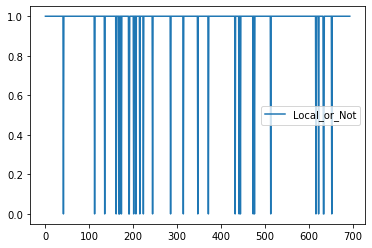

In [56]:
data=my_df.iloc[:,[6,10]]
data.plot()

In [73]:
my_df.dtypes

name             object
categories       object
lat             float64
lng             float64
id               object
District         object
Population       object
Area             object
Density          object
likes             int64
Local_or_Not      int64
ranking           int64
dtype: object

# Decision Tree(Classification)

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
X = my_df[['likes','ranking']].values
X[0:5]

array([[80,  2],
       [34,  2],
       [75,  2],
       [ 5,  1],
       [30,  2]])

In [75]:
y = my_df['Local_or_Not']
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: Local_or_Not, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [77]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [78]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [79]:
predTree = drugTree.predict(X_testset)

In [80]:
print (predTree [0:5])
print (y_testset [0:5])

[1 1 1 1 1]
548    1
91     1
353    1
431    1
433    1
Name: Local_or_Not, dtype: int64


In [81]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9521531100478469
